In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud

In [8]:
data = pd.read_csv('Psychosocial_Health_Analysis.csv')

In [9]:
data.head(10)

,Age,Gender,Problem_description,problem_summary,problem_category,psychological_catehory
0,28,Female,A woman is sharing their challenges as the on...,Financial and emotional stress seeking support...,Financial,Stress
1,34,Male,"After three months of marriage, I am happy wit...",Blaming without fault causing distress in the ...,Relationship,Relationship
2,24,Male,Conflict in the marriage due to extended perio...,Marital conflicts affecting mental well-being.,Financial,Relationship
3,20,Male,"How to increase confidence? Feeling insecure, ...",Seeking guidance on improving confidence and d...,Self-esteem,Stress
4,30,Male,The speaker's father passed away when they wer...,"Family faces adversity, finds strength within.",Family,Financial
5,22,Female,"The user is in a complicated situation, caught...",Relationship dilemma: committed boyfriend vs n...,Relationship,Anxiety
6,25,Female,The user was previously in a relationship but ...,Struggling to move on from past relationship.,Relationship,Stress
7,26,Male,The user's ex-girlfriend left abruptly due to ...,Ex-girlfriend left due to societal pressure.,Relationship,Emotional
8,24,Male,The user is experiencing emotional turmoil due...,Neglect in a long-term relationship causes dis...,Relationship,Stress
9,23,Female,The user feels overwhelmed by their spouse's e...,User seeks help dealing with spouse's demands,Relationship,Stress


In [10]:
print(data.isnull().sum())

Age                       0
Gender                    0
Problem_description       0
problem_summary           0
problem_category          0
psychological_catehory    0
dtype: int64


In [11]:
data = data.dropna()

In [12]:
data.rename(columns={'psychological_catehory': 'psychological_category'}, inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     95 non-null     int64 
 1   Gender                  95 non-null     object
 2   Problem_description     95 non-null     object
 3   problem_summary         95 non-null     object
 4   problem_category        95 non-null     object
 5   psychological_category  95 non-null     object
dtypes: int64(1), object(5)
memory usage: 4.6+ KB


In [14]:
categories = data['problem_category'].value_counts()
print(categories)

problem_category
Relationship                       35
Family                              7
Mental Health                       6
Financial                           4
Stress                              4
Anxiety                             3
 Relationship                       3
Communication                       3
Legal                               3
Marital                             3
Self-Esteem                         2
 Emotional                          2
Emotional                           2
Self-esteem                         2
 Self-Esteem                        1
 Anxiety                            1
Adolescent                          1
Physical                            1
 Family                             1
health disclosure issue             1
 Social                             1
Motor coordination difficulties     1
Social                              1
 Trust                              1
Educational                         1
Cultural                         

In [15]:
# Clean the 'problem_category' column by stripping leading/trailing spaces and converting all values to lowercase
data['problem_category'] = data['problem_category'].str.strip()
data['problem_category'] = data['problem_category'].str.lower()


In [16]:
categories = data['problem_category'].value_counts()
print(categories)

problem_category
relationship                       39
family                              8
mental health                       6
self-esteem                         5
financial                           4
emotional                           4
stress                              4
anxiety                             4
communication                       3
legal                               3
marital                             3
cultural                            2
physical                            2
social                              2
trust                               1
motor coordination difficulties     1
health disclosure issue             1
educational                         1
love                                1
adolescent                          1
Name: count, dtype: int64


In [17]:
# Cleaning the psychological category column
data['psychological_category'] = data['psychological_category'].str.strip()
data['psychological_category'] = data['psychological_category'].str.lower()
categories = data['psychological_category'].value_counts()
print(categories)

psychological_category
stress                     23
anxiety                    10
family                      8
depression                  7
relationship                6
emotional                   5
guilt                       4
interpersonal conflict      2
insecurity                  2
mood swings                 2
suicidal                    2
interpersonal conflicts     2
frustration                 2
financial                   2
trauma                      1
breakup distress            1
intimacy                    1
marital stress              1
fear                        1
aggressive behavior         1
family pressure             1
mental health               1
marital                     1
loneliness                  1
divorce                     1
obsessive over-analysis     1
dissatisfaction             1
apathy                      1
relationships.              1
odc                         1
heartbreak                  1
sleep disorders             1
Name: count, dtyp

In [18]:
replacement_dict = {
    'interpersonal conflicts': 'interpersonal conflict',
    'relationships.': 'relationship'
}

# Replace variants with standardized form using the dictionary
data['psychological_category'] = data['psychological_category'].apply(lambda x: replacement_dict.get(x, x))


In [19]:
categories = data['psychological_category'].value_counts()
print(categories)

psychological_category
stress                     23
anxiety                    10
family                      8
relationship                7
depression                  7
emotional                   5
interpersonal conflict      4
guilt                       4
financial                   2
frustration                 2
suicidal                    2
mood swings                 2
insecurity                  2
fear                        1
marital stress              1
family pressure             1
breakup distress            1
trauma                      1
intimacy                    1
aggressive behavior         1
mental health               1
marital                     1
loneliness                  1
divorce                     1
obsessive over-analysis     1
dissatisfaction             1
apathy                      1
odc                         1
heartbreak                  1
sleep disorders             1
Name: count, dtype: int64


In [20]:
age=data['Age'].value_counts()
print(age)

Age
24    14
20    14
26    14
25    10
23    10
22     8
27     6
30     4
17     3
16     3
28     2
18     2
21     2
34     1
33     1
29     1
Name: count, dtype: int64


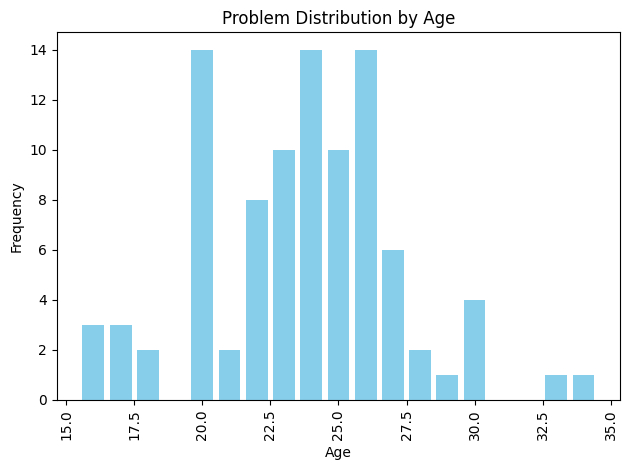

In [21]:
plt.bar(age.index, age.values, color='skyblue')
plt.title('Problem Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [22]:
categories = data['Gender'].value_counts()
print(categories)

Gender
Female    48
Male      47
Name: count, dtype: int64


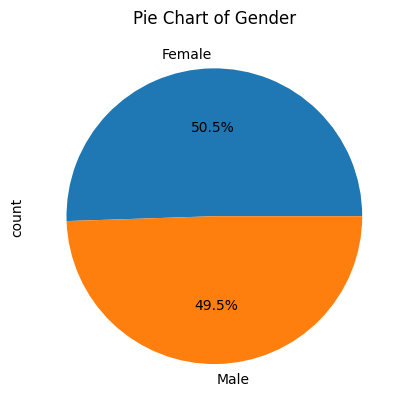

In [26]:
data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Gender')
plt.show()

In [28]:
data.head(10)

,Age,Gender,Problem_description,problem_summary,problem_category,psychological_category
0,28,Female,A woman is sharing their challenges as the on...,Financial and emotional stress seeking support...,financial,stress
1,34,Male,"After three months of marriage, I am happy wit...",Blaming without fault causing distress in the ...,relationship,relationship
2,24,Male,Conflict in the marriage due to extended perio...,Marital conflicts affecting mental well-being.,financial,relationship
3,20,Male,"How to increase confidence? Feeling insecure, ...",Seeking guidance on improving confidence and d...,self-esteem,stress
4,30,Male,The speaker's father passed away when they wer...,"Family faces adversity, finds strength within.",family,financial
5,22,Female,"The user is in a complicated situation, caught...",Relationship dilemma: committed boyfriend vs n...,relationship,anxiety
6,25,Female,The user was previously in a relationship but ...,Struggling to move on from past relationship.,relationship,stress
7,26,Male,The user's ex-girlfriend left abruptly due to ...,Ex-girlfriend left due to societal pressure.,relationship,emotional
8,24,Male,The user is experiencing emotional turmoil due...,Neglect in a long-term relationship causes dis...,relationship,stress
9,23,Female,The user feels overwhelmed by their spouse's e...,User seeks help dealing with spouse's demands,relationship,stress


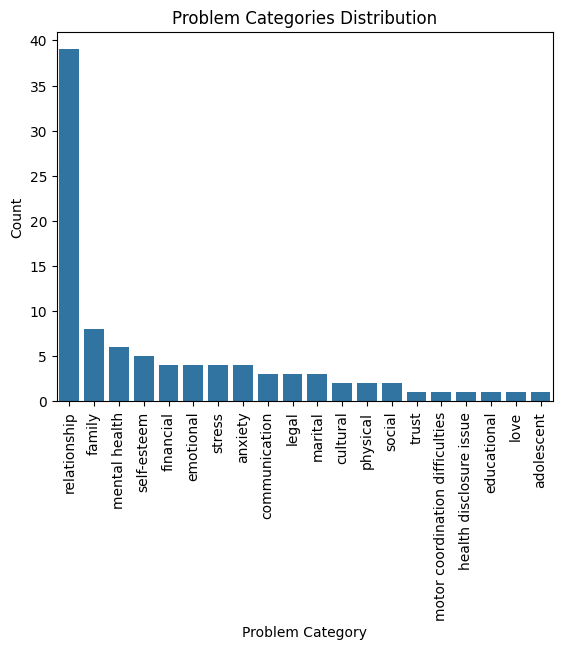

In [31]:
# Problem Categories Distribution Bar Chart

sns.countplot(x='problem_category', data=data, order=data['problem_category'].value_counts().index)
plt.title('Problem Categories Distribution')
plt.xlabel('Problem Category')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

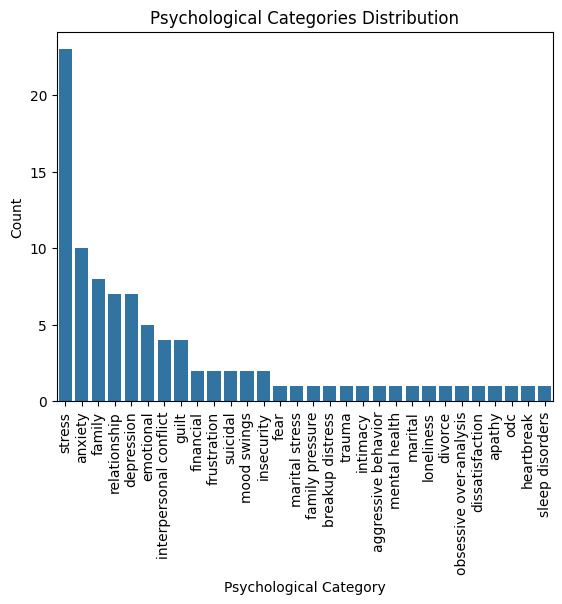

In [32]:
# Psychological Categories Distribution Bar Chart
sns.countplot(x='psychological_category', data=data, order=data['psychological_category'].value_counts().index)
plt.title('Psychological Categories Distribution')
plt.xlabel('Psychological Category')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

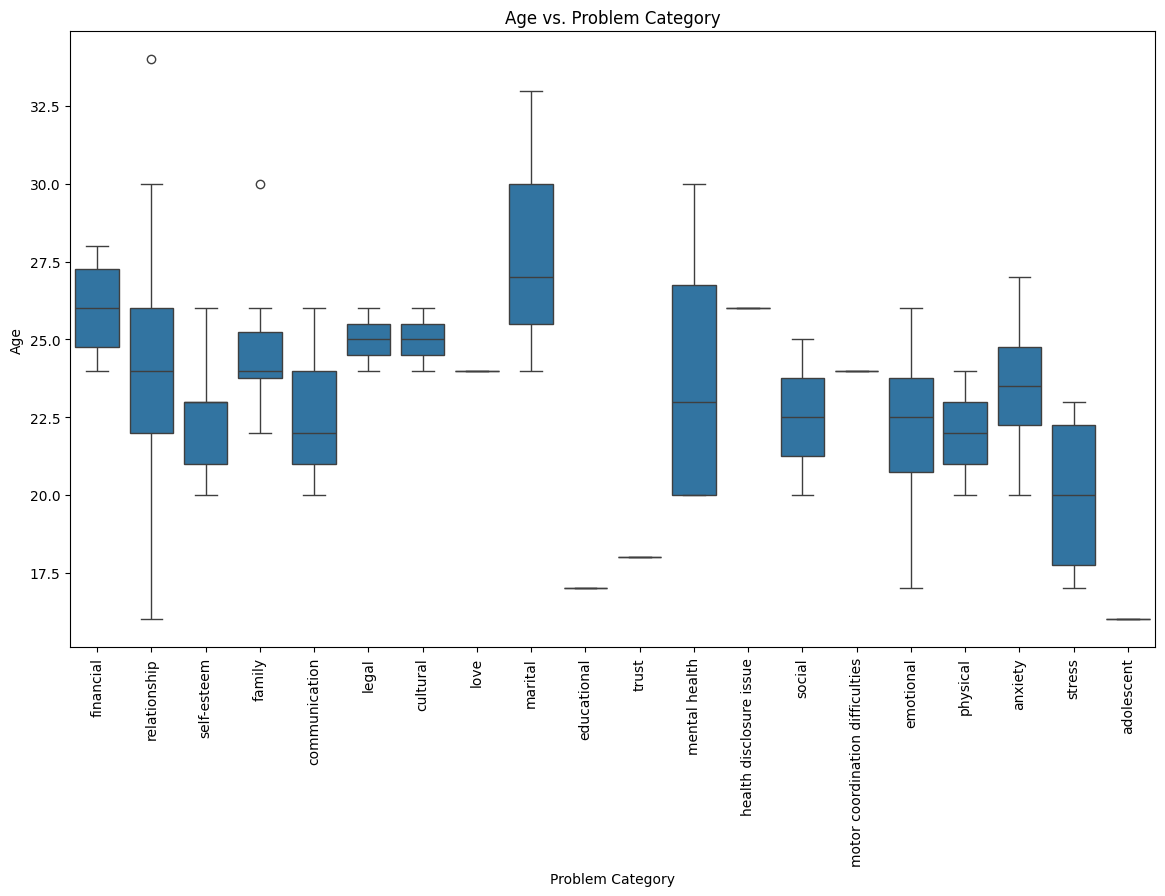

In [34]:
# Age vs. Problem Category Box Plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='problem_category', y='Age', data=data)
plt.title('Age vs. Problem Category')
plt.xlabel('Problem Category')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

<Figure size 1400x800 with 0 Axes>

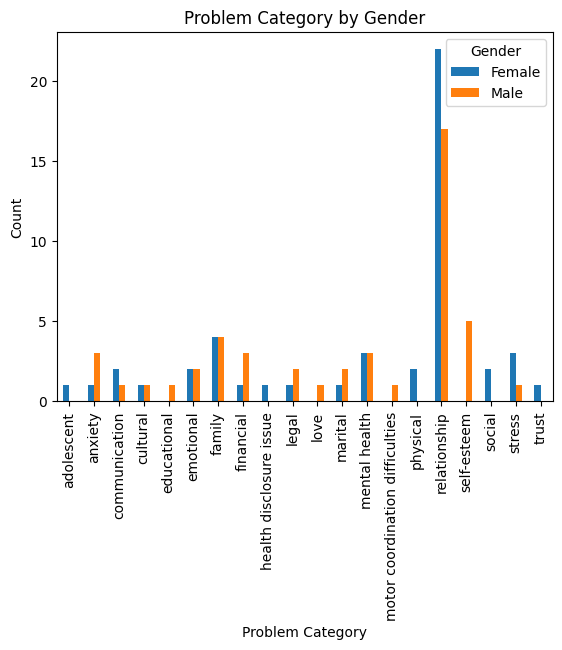

In [37]:
# Problem Category by Gender (Stacked Bar Chart)
plt.figure(figsize=(14, 8))
problem_category_gender = data.groupby(['problem_category', 'Gender']).size().unstack()
problem_category_gender.plot(kind='bar', stacked=False)
plt.title('Problem Category by Gender')
plt.xlabel('Problem Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

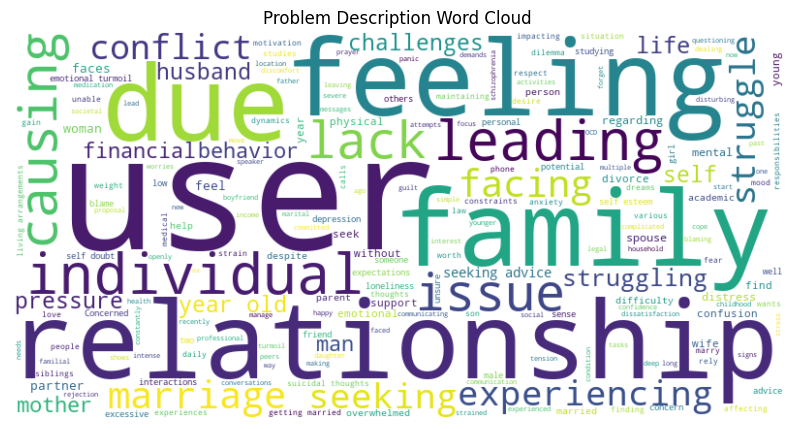

In [38]:
# Problem Description Word Cloud
text = ' '.join(data['Problem_description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Problem Description Word Cloud')
plt.show()

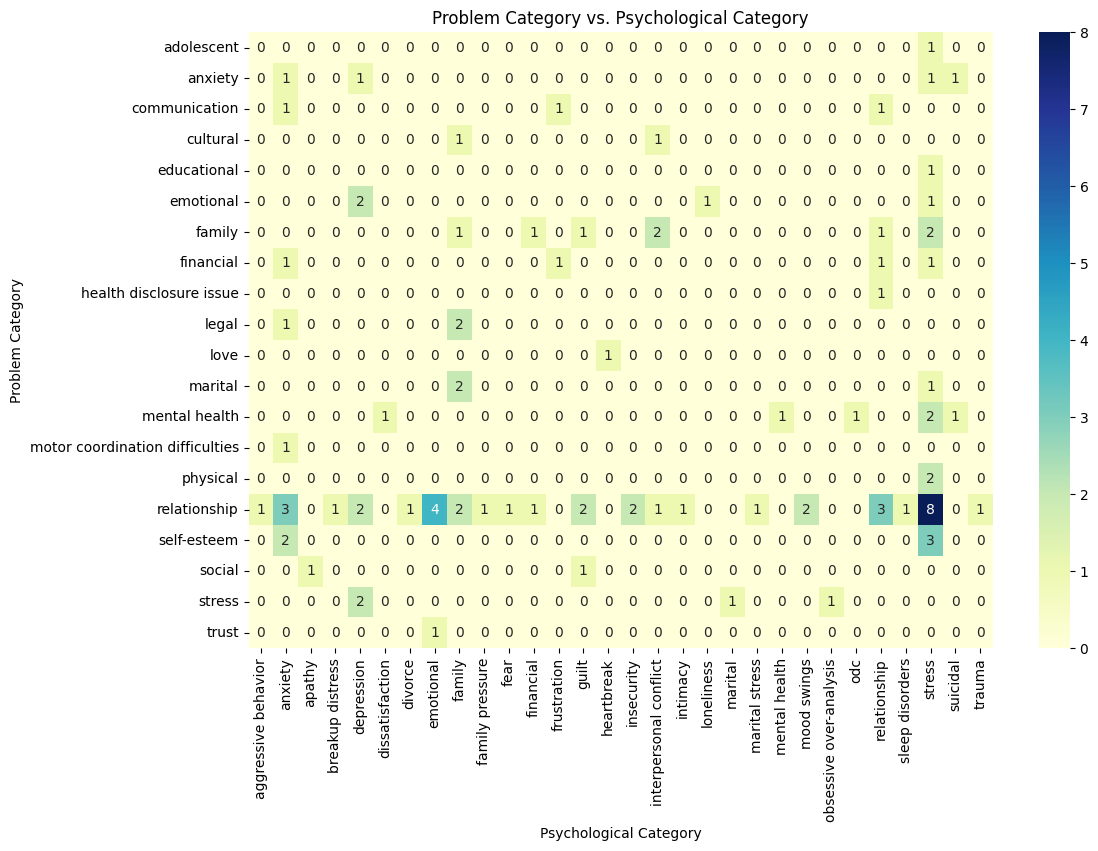

In [42]:
# Problem Category vs. Psychological Category Heatmap
plt.figure(figsize=(12, 8))
problem_psych_category = pd.crosstab(data['problem_category'], data['psychological_category'])
sns.heatmap(problem_psych_category, annot=True, cmap='YlGnBu')
plt.title('Problem Category vs. Psychological Category')
plt.xlabel('Psychological Category')
plt.ylabel('Problem Category')
plt.show()

C:\Users\Ashay\AppData\Local\Temp\ipykernel_19580\2609155901.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  problem_category_age_group = data.groupby([age_bins, 'problem_category']).size().unstack()


<Figure size 1600x1000 with 0 Axes>

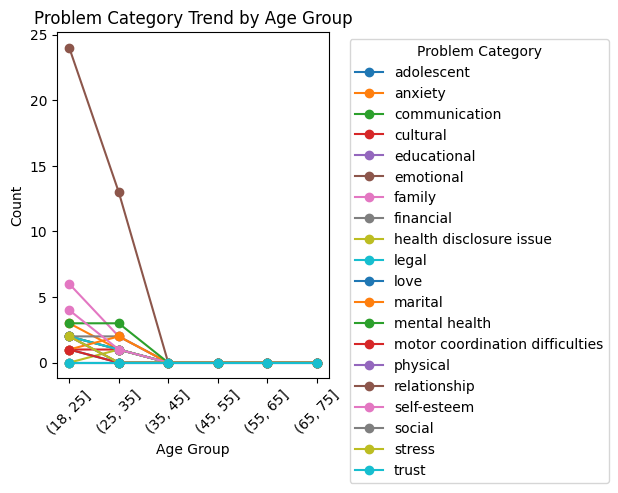

In [59]:
# Problem Category Trend by Age Group (Line Chart)
age_bins = pd.cut(data['Age'], bins=[18, 25, 35, 45, 55, 65, 75])
problem_category_age_group = data.groupby([age_bins, 'problem_category']).size().unstack()

plt.figure(figsize=(16,10))
problem_category_age_group.plot(kind='line', marker='o')
plt.title('Problem Category Trend by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-ticks to prevent overlap
plt.legend(title='Problem Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [61]:
data.to_csv('PsychosocialAnalysis_cleaned .csv', index=False)

In [ ]:
#Insights:
#Most patients are in the 20-24 age range.
#The most common problem category is relationship problems.
#Females are more likely to have mental health problems than males.
#The most common mental health problem is stress.
#The average age of patients with mental health problems is 23.65 years.